## Installing Selenium and undetected-chromedriver

In [4]:
!pip install selenium

In [5]:
pip install undetected-chromedriver

## Setting up the Driver and сollecting product information

In [28]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

options=uc.ChromeOptions()
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")
driver=uc.Chrome(options=options)

titles=[]
ratings=[]
reviews=[]
current_prices=[]
old_prices=[]



for page in range(1, 21):
    url = f"https://kz.iherb.com/specials?p={page}"
    driver.get(url)
    WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".product-cell-container")))
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)
    
    pr = driver.find_elements(By.CSS_SELECTOR, ".product-cell-container")
    for i in pr:
        try:
            title=i.find_element(By.CSS_SELECTOR, "[itemprop='name']").text.strip()
            if not title:
                continue
        except:
            continue

        titles.append(title)

        try:
            rating=i.find_element(By.CSS_SELECTOR, "a.stars").get_attribute("title").split(" - ")[0]
        except:
            rating=''

        try:
            review=i.find_element(By.CSS_SELECTOR, "a.stars").get_attribute("title").split(" - ")[1]
            review=review.replace(" Отзывы", "").strip()
        except:
            review=''

        try:
            current_price=i.find_element(By.CSS_SELECTOR, ".price.discount-red bdi").text.strip()
        except:
            current_price=''

        try:
            old_price=i.find_element(By.CSS_SELECTOR, ".price-olp bdi").text.strip()
        except:
            old_price=''
       
        ratings.append(rating)
        reviews.append(review)
        current_prices.append(current_price)
        old_prices.append(old_price)
        



driver.quit()



## Collecting additional product information


In [ ]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time


options=uc.ChromeOptions()
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")
driver=uc.Chrome(options=options)

discount_list=[]
sold_list=[] 

for page in range(1, 21):  
        url=f"https://kz.iherb.com/specials?p={page}"
        driver.get(url)
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".product-cell-container")))
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)

        pr = driver.find_elements(By.CSS_SELECTOR, ".product-cell-container")

        for i in pr:
            try:
                discount=i.find_element(By.CSS_SELECTOR, "span.percentage-off bdi").text.strip()
                
            except:
                discount =''
            try:
                sold_text=i.find_element(By.CSS_SELECTOR, ".recent-activity-message-wrapper").text.strip()
            except:
                sold_text = ''
            
            discount_list.append(discount)
            sold_list.append(sold_text)


driver.quit()

## Creating the DataFrame

In [8]:
df = pd.DataFrame({"Name of product": titles,"Rating": ratings,"Number of review": reviews,"Price(tenge)": current_prices,"Old price(tenge)": old_prices,
"Sold": sold_list,"Discount":discount_list})
df


,Name of product,Rating,Number of review,Price(tenge),Old price(tenge),Sold,Discount
0,"California Gold Nutrition, Gold C™, витамин C ...",4.8/5,348 978,"₸2,262.55","₸3,016.73",80 000+ товаров продано за последние 30 дн.,Скидка 25%
1,"California Gold Nutrition, LactoBif® 30, проби...",4.7/5,141 824,"₸11,260.82","₸13,248.02",80 000+ товаров продано за последние 30 дн.,Скидка 15%
2,"California Gold Nutrition, Омега 800 ультракон...",4.8/5,111 750,"₸11,942.42","₸15,923.23",40 000+ товаров продано за последние 30 дн.,Скидка 25%
3,"California Gold Nutrition, LactoBif® 5, пробио...",4.7/5,94 835,"₸4,333.00","₸5,777.33",40 000+ товаров продано за последние 30 дн.,Скидка 25%
4,"California Gold Nutrition, омега-3, рыбий жир ...",4.8/5,441 428,"₸12,593.44","₸16,791.26",30 000+ товаров продано за последние 30 дн.,Скидка 25%
...,...,...,...,...,...,...,...
907,"Life Extension, FLORASSIST, иммунная защита и ...",4.6/5,470,"₸13,507.27","₸15,008.08",100+ товаров продано за последние 30 дн.,Скидка 10%
908,"CP-1, Премиальное средство для волос, 250 мл",4.6/5,539,"₸9,769.53","₸10,855.03",,Скидка 10%
909,"Zen Nutrients, NeuraZenx®, поддержка нервов, 1...",4.3/5,25,"₸21,665.28","₸25,488.56",100+ товаров продано за последние 30 дн.,Скидка 15%
910,"True Citrus, True Lemon, энергия, клубника, др...",4.6/5,90,"₸2,120.82","₸2,356.47",300+ товаров продано за последние 30 дн.,Скидка 10%


## Detecting missing values

In [9]:
import numpy as np
df = df.replace('', np.nan)


In [10]:
df.isnull().sum()

Name of product       0
Rating                0
Number of review      0
Price(tenge)          1
Old price(tenge)      1
Sold                135
Discount             29
dtype: int64

## Handling missing values

In [11]:
df.fillna(0, inplace=True) 

In [12]:
df.isnull().sum()

Name of product     0
Rating              0
Number of review    0
Price(tenge)        0
Old price(tenge)    0
Sold                0
Discount            0
dtype: int64

### Cleaning data from unnecessary informations
#### 1. Cleaning spaces in the column "Number of reviews"

In [13]:
import pandas as pd
import re
df["Number of review"]=df["Number of review"].astype(str).str.replace(r"\s+", "", regex=True).str.strip()





#### 2. Deleting the unnecessary /5 part of the column "Rating"

In [14]:
df["Rating"]=df["Rating"].astype(str).str.replace("/5", "").str.strip()

#### 3. Deleting "₸" and comma from price columns

In [15]:
df["Price(tenge)"]=df["Price(tenge)"].astype(str).str.replace("₸", "").str.replace(",", "").str.strip()
df["Old price(tenge)"]=df["Old price(tenge)"].astype(str).str.replace("₸", "").str.replace(",", "").str.strip()

#### 4. Removing spaces inside the numbers and extract only the numbers from the text of the column 'Sold'

In [16]:
df["Sold"]=df["Sold"].astype(str).str.replace(" ", "").str.strip()
df["Sold"]=df["Sold"].astype(str)
df["Sold"]=df["Sold"].str.extract(r'(\d+)')  


#### 5. Deleting "%" and unnesecary words from price columns

In [17]:
df["Discount"]=df["Discount"].astype(str).str.replace("Скидка", "").str.replace("%", "").str.strip()

In [18]:
df

,Name of product,Rating,Number of review,Price(tenge),Old price(tenge),Sold,Discount
0,"California Gold Nutrition, Gold C™, витамин C ...",4.8,348978,2262.55,3016.73,80000,25
1,"California Gold Nutrition, LactoBif® 30, проби...",4.7,141824,11260.82,13248.02,80000,15
2,"California Gold Nutrition, Омега 800 ультракон...",4.8,111750,11942.42,15923.23,40000,25
3,"California Gold Nutrition, LactoBif® 5, пробио...",4.7,94835,4333.00,5777.33,40000,25
4,"California Gold Nutrition, омега-3, рыбий жир ...",4.8,441428,12593.44,16791.26,30000,25
...,...,...,...,...,...,...,...
907,"Life Extension, FLORASSIST, иммунная защита и ...",4.6,470,13507.27,15008.08,100,10
908,"CP-1, Премиальное средство для волос, 250 мл",4.6,539,9769.53,10855.03,0,10
909,"Zen Nutrients, NeuraZenx®, поддержка нервов, 1...",4.3,25,21665.28,25488.56,100,15
910,"True Citrus, True Lemon, энергия, клубника, др...",4.6,90,2120.82,2356.47,300,10


## Converting to numeric 
#### Converting percent of demand and discount to coefficient

In [20]:
df["Number of review"]=pd.to_numeric(df["Number of review"], errors='coerce').astype(int)
df["Discount"]=pd.to_numeric(df["Discount"], errors='coerce') / 100 
df["Rating"]=pd.to_numeric(df["Rating"], errors='coerce')
df["Price(tenge)"]=pd.to_numeric(df["Price(tenge)"], errors='coerce')
df["Old price(tenge)"]=pd.to_numeric(df["Old price(tenge)"], errors='coerce')
df["Sold"]=pd.to_numeric(df["Sold"], errors='coerce')

In [21]:
df

,Name of product,Rating,Number of review,Price(tenge),Old price(tenge),Sold,Discount
0,"California Gold Nutrition, Gold C™, витамин C ...",4.8,348978,2262.55,3016.73,80000,0.25
1,"California Gold Nutrition, LactoBif® 30, проби...",4.7,141824,11260.82,13248.02,80000,0.15
2,"California Gold Nutrition, Омега 800 ультракон...",4.8,111750,11942.42,15923.23,40000,0.25
3,"California Gold Nutrition, LactoBif® 5, пробио...",4.7,94835,4333.00,5777.33,40000,0.25
4,"California Gold Nutrition, омега-3, рыбий жир ...",4.8,441428,12593.44,16791.26,30000,0.25
...,...,...,...,...,...,...,...
907,"Life Extension, FLORASSIST, иммунная защита и ...",4.6,470,13507.27,15008.08,100,0.10
908,"CP-1, Премиальное средство для волос, 250 мл",4.6,539,9769.53,10855.03,0,0.10
909,"Zen Nutrients, NeuraZenx®, поддержка нервов, 1...",4.3,25,21665.28,25488.56,100,0.15
910,"True Citrus, True Lemon, энергия, клубника, др...",4.6,90,2120.82,2356.47,300,0.10


### Outliers(using IQR Method)

In [23]:
c=['Price(tenge)', 'Old price(tenge)', 'Sold','Number of review']
def removeoutliers(df):
    for i in c:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3 - Q1
        lb=Q1 - 1.5 * IQR
        ub=Q3 + 1.5 * IQR
        
        df = df[(df[i] >= lb) & (df[i] <= ub)]
    return df

df=removeoutliers(df)
df


,Name of product,Rating,Number of review,Price(tenge),Old price(tenge),Sold,Discount
48,"California Gold Nutrition, Sport, якорцы, 1000...",4.6,1974,3906.81,4596.25,1000,0.15
59,"Maui Babe, After Browning Lotion, лосьон после...",4.7,1323,7950.98,8834.42,1000,0.10
64,"Lake Avenue Nutrition, коэнзим Q10 с PQQ, 100 ...",4.8,4979,7680.57,9035.97,1000,0.15
68,"Little Bellies, Органические крекеры для живот...",4.7,1179,2120.82,2356.47,1000,0.10
69,"NOW Foods, Кверцетин, 500 мг, 100 растительных...",4.8,1328,11412.01,13425.89,1000,0.15
...,...,...,...,...,...,...,...
906,"Charlie and Frank, шампунь для домашних животн...",4.7,2196,4993.81,5223.55,100,0.04
907,"Life Extension, FLORASSIST, иммунная защита и ...",4.6,470,13507.27,15008.08,100,0.10
908,"CP-1, Премиальное средство для волос, 250 мл",4.6,539,9769.53,10855.03,0,0.10
910,"True Citrus, True Lemon, энергия, клубника, др...",4.6,90,2120.82,2356.47,300,0.10


### Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_normalized=scaler.fit_transform(df[c])


In [26]:
df_normalized

array([[0.17055683, 0.16354296, 1.        , 0.3379582 ],
       [0.39609047, 0.36677917, 1.        , 0.22644741],
       [0.38101035, 0.37644425, 1.        , 0.85268928],
       ...,
       [0.49750663, 0.46367502, 0.        , 0.09215485],
       [0.07095646, 0.05613707, 0.3       , 0.01524495],
       [0.30343986, 0.29797127, 0.        , 0.01370332]])

In [21]:
df.to_csv("iherb_salesFINAL.csv")

## 2 PART

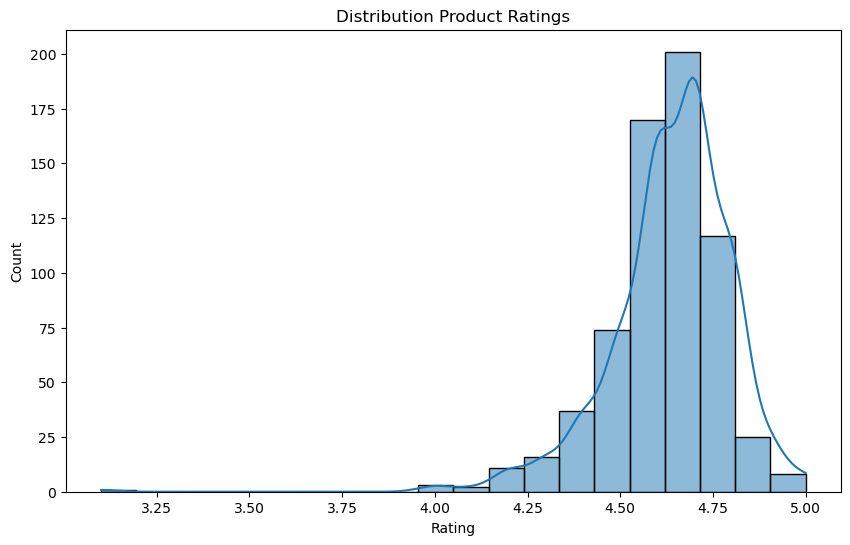

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Rating', bins=20, kde=True)
plt.title('Distribution Product Ratings')
plt.show()

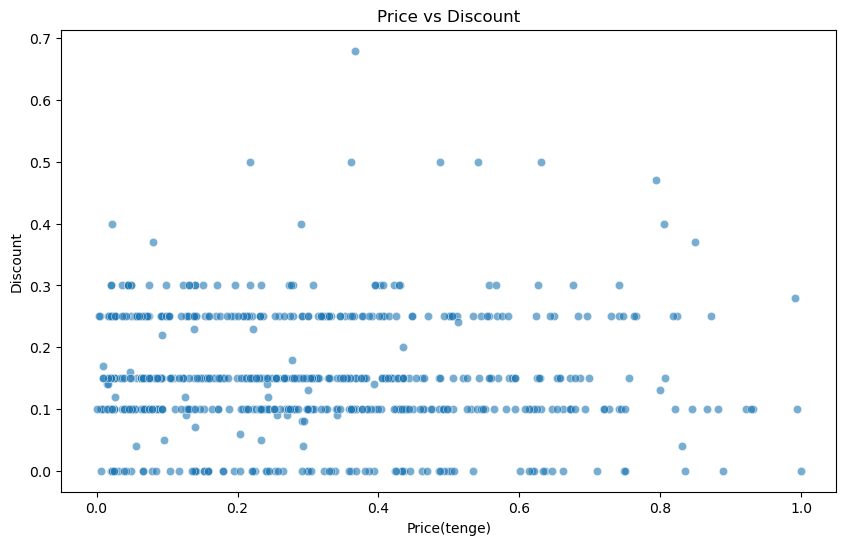

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price(tenge)', y='Discount', alpha=0.6)
plt.title('Price vs Discount')
plt.show()

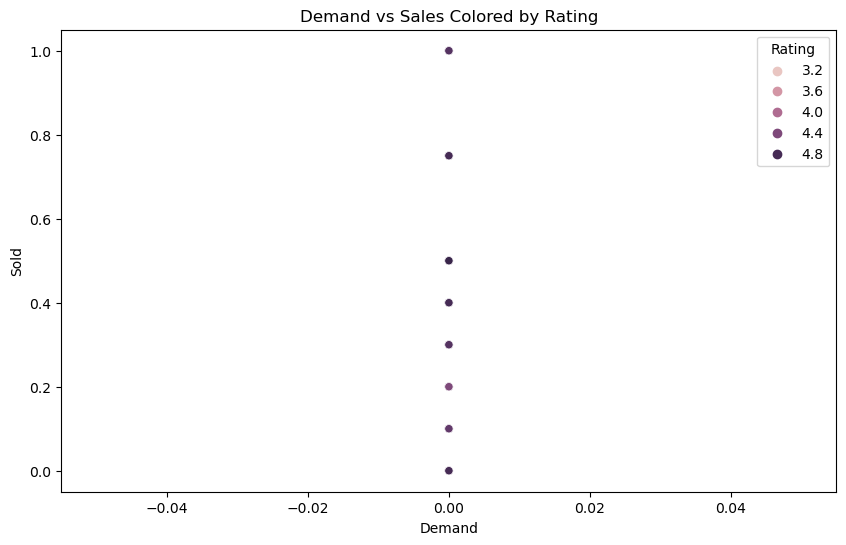

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Demand', y='Sold', hue='Rating')
plt.title('Demand vs Sales Colored by Rating')
plt.show()

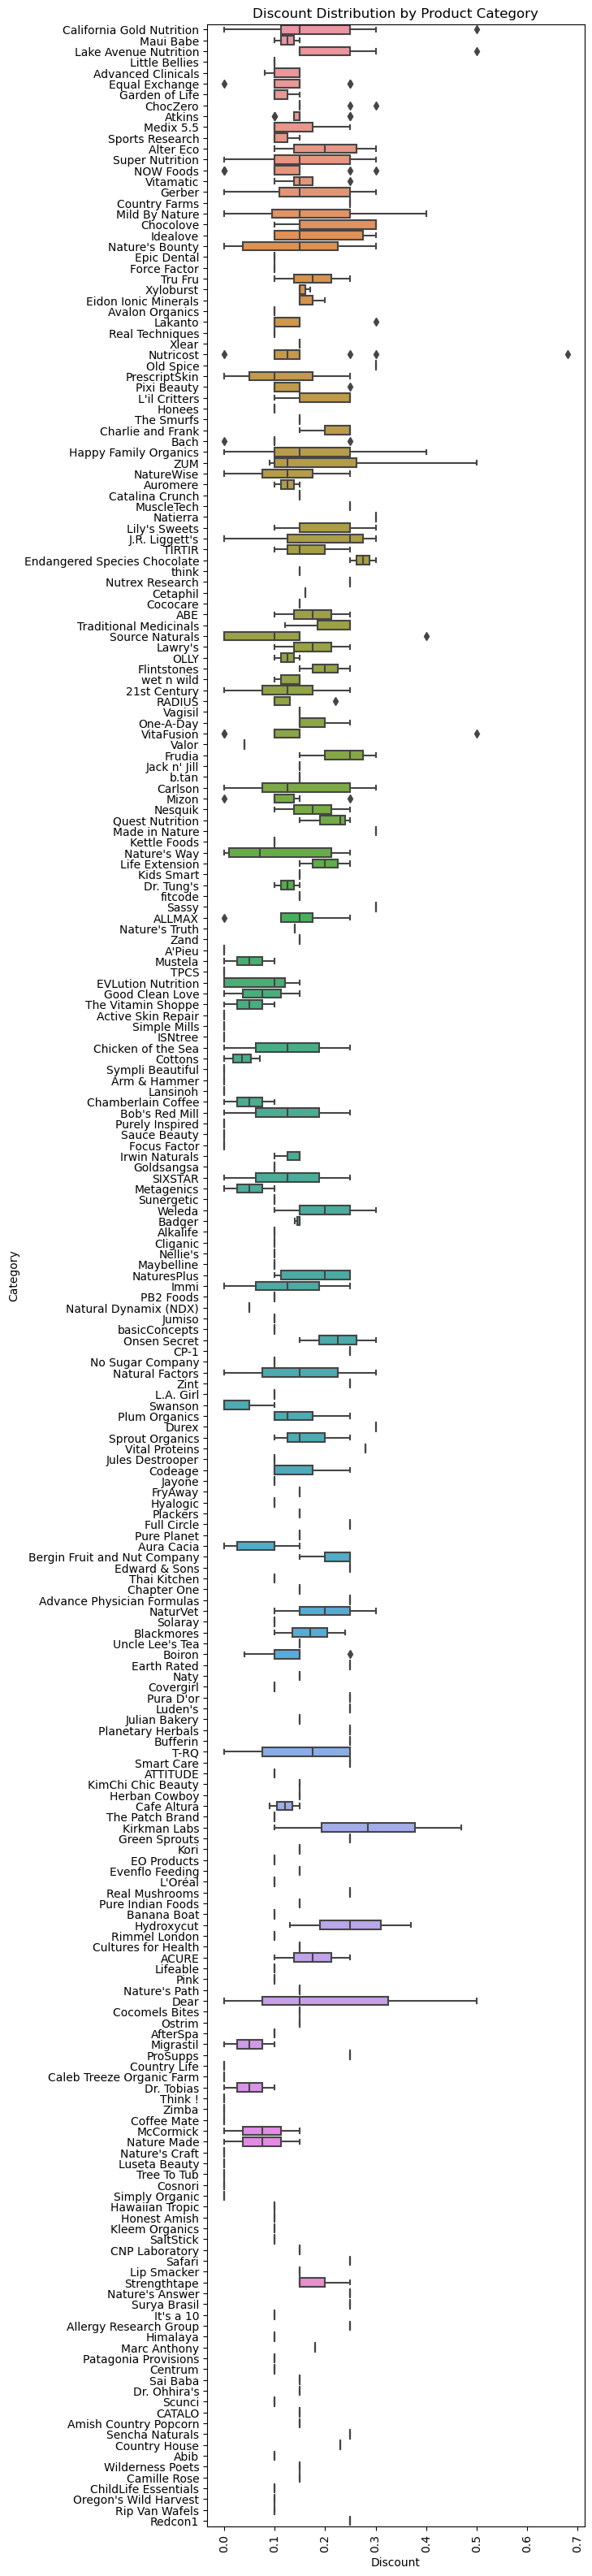

In [25]:
df['Category'] = df['Name of product'].str.split(',').str[0]

plt.figure(figsize=(6,40))
sns.boxplot(data=df, y='Category', x='Discount')
plt.xticks(rotation=90)
plt.title('Discount Distribution by Product Category')
plt.show()

## Feature Engineering

In [26]:
df["Real_Discount_Perc"] = ((df["Old price(tenge)"] - df["Price(tenge)"]) / df["Old price(tenge)"]).round(2)
df[["Old price(tenge)", "Price(tenge)", "Real_Discount_Perc"]]

,Old price(tenge),Price(tenge),Real_Discount_Perc
48,0.161247,0.157051,0.03
59,0.361630,0.367540,-0.02
64,0.371159,0.353466,0.05
68,0.055349,0.064095,-0.16
70,0.827315,0.683047,0.17
...,...,...,...
905,0.000000,0.009258,-inf
906,0.151693,0.159547,-0.05
907,0.815766,0.817471,-0.00
910,0.259879,0.214561,0.17


In [27]:
df["Price_per_Demand"] = (df["Price(tenge)"] / (df["Demand"] + 1e-3)).round(2)
df[["Price(tenge)", "Demand", "Price_per_Demand"]]

,Price(tenge),Demand,Price_per_Demand
48,0.157051,0.0,157.05
59,0.367540,0.0,367.54
64,0.353466,0.0,353.47
68,0.064095,0.0,64.09
70,0.683047,0.0,683.05
...,...,...,...
905,0.009258,0.0,9.26
906,0.159547,0.0,159.55
907,0.817471,0.0,817.47
910,0.214561,0.0,214.56


In [28]:
df["Rating_Impact"] = (df["Rating"] * df["Number of review"]).round(2)
df[["Rating", "Number of review", "Rating_Impact"]]

,Rating,Number of review,Rating_Impact
48,4.6,0.337845,1.55
59,4.7,0.226486,1.06
64,4.8,0.852835,4.09
68,4.7,0.201473,0.95
70,4.7,0.862943,4.06
...,...,...,...
905,4.6,0.881617,4.06
906,4.8,0.046942,0.23
907,4.7,0.021929,0.10
910,4.8,0.041631,0.20


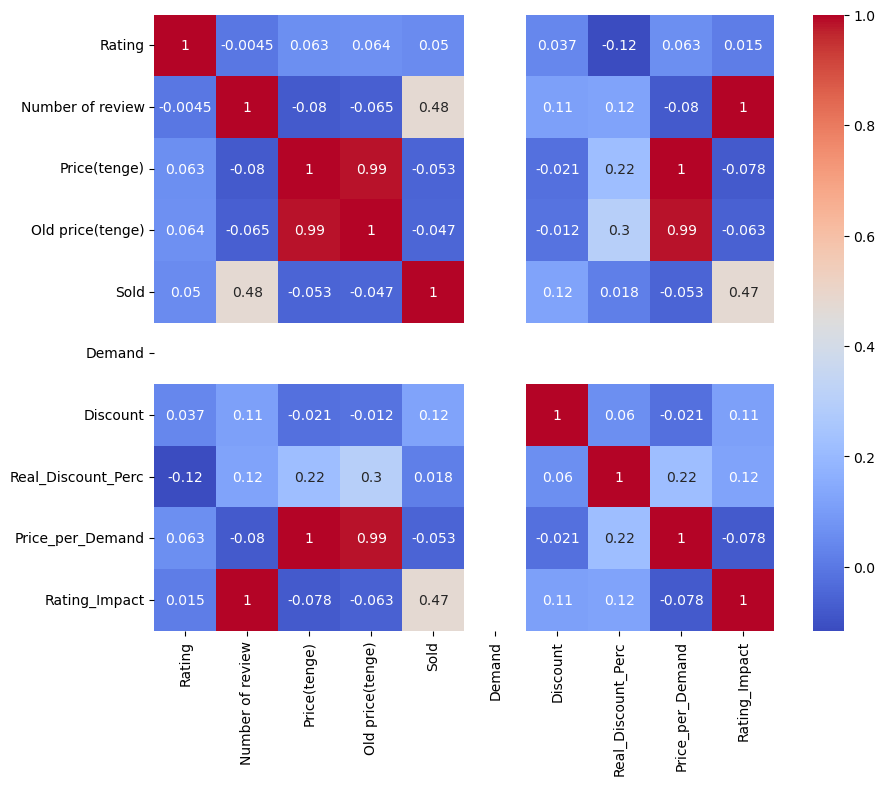

In [29]:
num_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(),annot=True, cmap="coolwarm")
plt.show()
